In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Water_pump_dataset.csv',index_col=0)
data.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [3]:
data.index = pd.to_datetime(data.timestamp)
data.drop('timestamp',axis=1,inplace=True)
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


## DATA PREPROCESSING

In [9]:
#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
#separating the target variable from the features
target = data['rul']
input_data = data.drop(columns='rul')

In [11]:
#Splitting the data into training,testing and validation sets
X_train,X_test,y_train,y_test = train_test_split(input_data,target, train_size=0.75, random_state=0)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL CONSTRUCTION

In [13]:
#Importing Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [117]:
#Importing model_evaluation modules
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error

In [15]:
#Here we instantiate all algorithms to be used
lr,dtr,etr,rr,xgr,gbr,rfr,svr,sgr, mlpr = LinearRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),Ridge(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),SVR(),SGDRegressor(), MLPRegressor()

In [19]:
#Creating a list of regressors to be iterated over with a for loop and computing all of their R2 scores(NB: This is the metric used to evaluate the accuracies of the resulting models)
regressors = [lr,dtr,etr,rr,xgr,gbr,rfr,svr,sgr,mlpr]
train_score = []
test_score = []
mean_abs_errors = []
max_errors = []
predictions = {}
for regressor in regressors:
    model = regressor.fit(X_train,y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,pred)
    max_err = max_error(y_test,pred)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
    mean_abs_errors.append(mae)
    max_errors.append(max_err)
    predictions[str(regressor)] = pred
    

C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
model = knn.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [46]:
train_score.append(model.score(X_train,y_train))
test_score.append(model.score(X_test,y_test))
mean_abs_errors.append(mean_absolute_error(y_test,y_pred))
max_errors.append(max_error(y_test,y_pred))
predictions['KNeighborsRegressor'] = y_pred

In [48]:
#Here, we present the model evaluation metrics in a pandas dataframe
ind= ['LinearRegression','DecisionTreeRegressor','ExtraTreeRegressor','Ridge','XGBRegressor',
      'GradientBoostingRegressor','RandomForestRegressor','SVR','SGDRegressor','MLPRegressor','KNeighborsRegressor']
metrics_df = pd.DataFrame(columns=['train_scores','test_scores','Mean_abs_Error','Max_error'], index =ind)
metrics_df['train_scores'] = train_score
metrics_df['test_scores'] = test_score
metrics_df['Mean_abs_Error'] = mean_abs_errors
metrics_df['Max_error'] = max_errors

In [49]:
metrics_df

,train_scores,test_scores,Mean_abs_Error,Max_error
LinearRegression,0.451255,0.456897,132.164280,1142.646166
DecisionTreeRegressor,0.999987,0.991727,1.242482,837.333333
ExtraTreeRegressor,0.999987,0.995830,1.147997,683.733333
Ridge,0.451255,0.456897,132.166068,1142.771962
XGBRegressor,0.994606,0.991223,11.520257,701.148403
GradientBoostingRegressor,0.905850,0.905013,47.981855,625.434302
RandomForestRegressor,0.999608,0.996727,1.393421,700.910958
SVR,0.547044,0.552321,104.029170,706.998028
SGDRegressor,0.449136,0.454680,132.481023,1204.657694
MLPRegressor,0.977297,0.975738,25.275220,565.728089


### INFERENCE
<p>As we can see, most of the algorithms performed well on the dataset except linear regression, ridge regressiom, SVR and SGDRegressor. We shall be focusing our model optimization on the algorithms that performed well on the dataset</p>

In [54]:
plt.style.use('fivethirtyeight')

In [57]:
cols = list(input_data.columns)
len(cols)

50

Text(0.5, 1.0, 'Graph of Feature Importances')

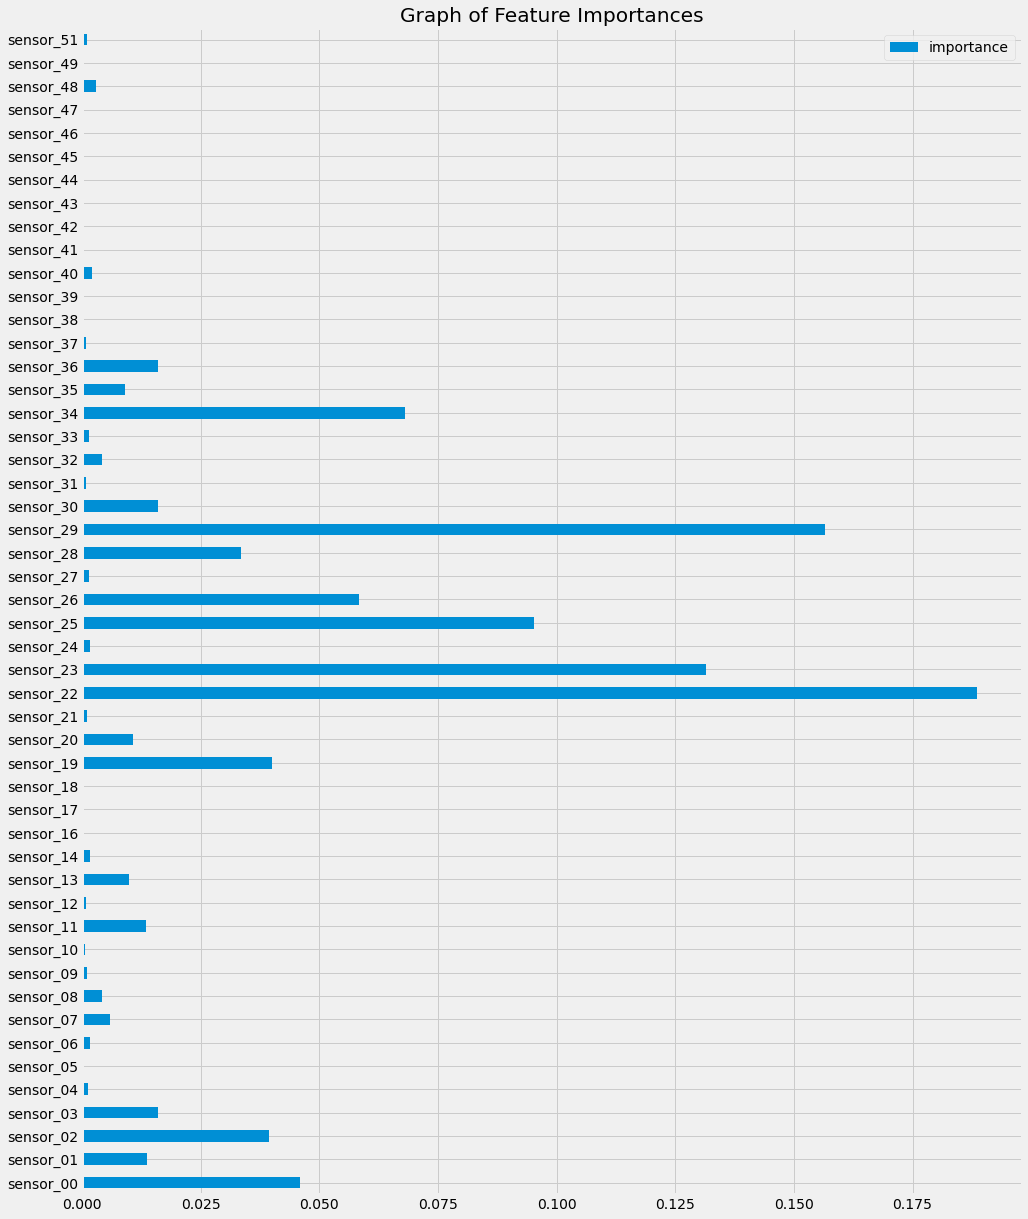

In [109]:
#Checking the most relevant features to the tree models
impt_features = rfr.feature_importances_
impt_df = pd.DataFrame(index = cols)
impt_df['importance']= impt_features
ax = impt_df.plot(kind='barh', figsize = (15,20))
ax.set_title('Graph of Feature Importances')

Text(0.5, 1.0, 'ExtraTreeRegressor: Model Vs Ground_truths')

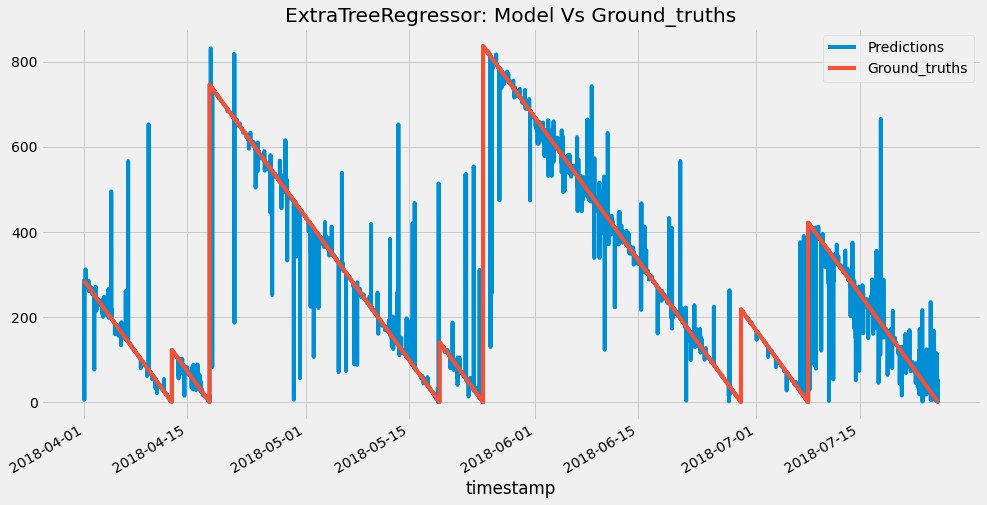

In [70]:
#Plotting the model
predicted_values = etr.predict(X_test)
actual_values = y_test
model_data = pd.DataFrame({'Predictions':predicted_values,'Ground_truths':actual_values})
ax1=model_data.plot(figsize=(15,8))
ax1.set_title('ExtraTreeRegressor: Model Vs Ground_truths')

In [102]:
def plot_model(algo,title):
    prediction = algo.predict(X_test)
    model_data = pd.DataFrame({'Predictions':prediction,'Ground_truths':y_test})
    ax1=model_data.plot(figsize=(15,8) )
    ax1.set_title(title+'Model Visualization')
    ax1.set_ylabel('Remaining Useful Life of Water Pump')
    plt.show

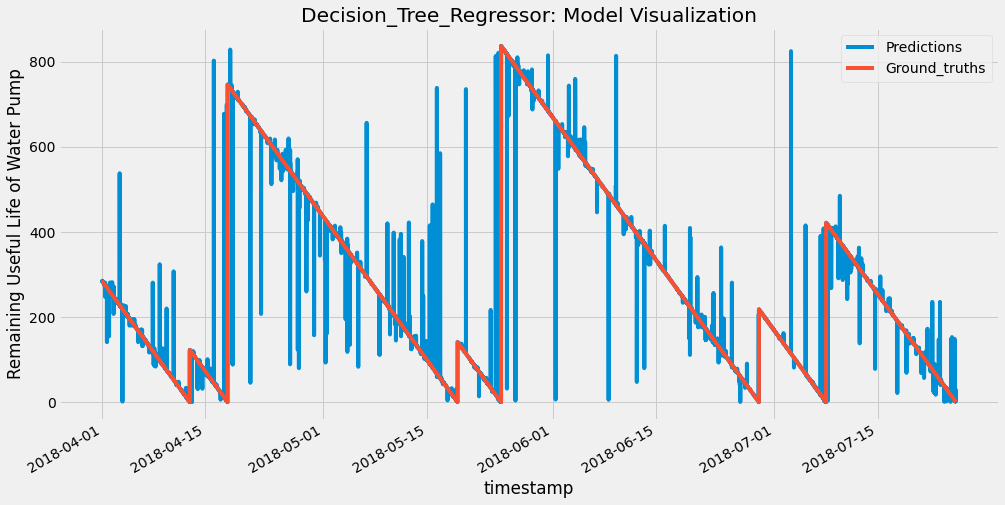

In [103]:
plot_model(dtr, 'Decision_Tree_Regressor: ')

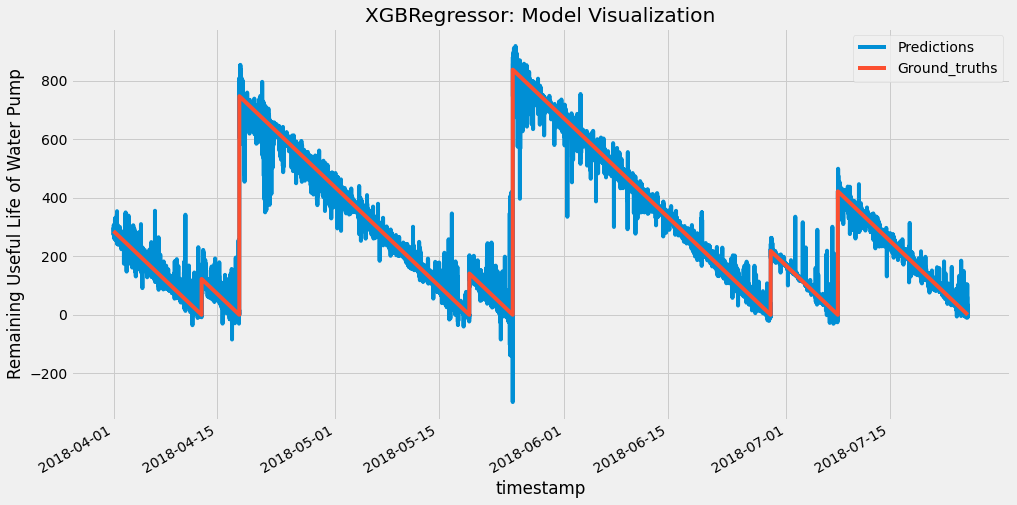

In [74]:
plot_model(xgr, 'XGBRegressor: ')

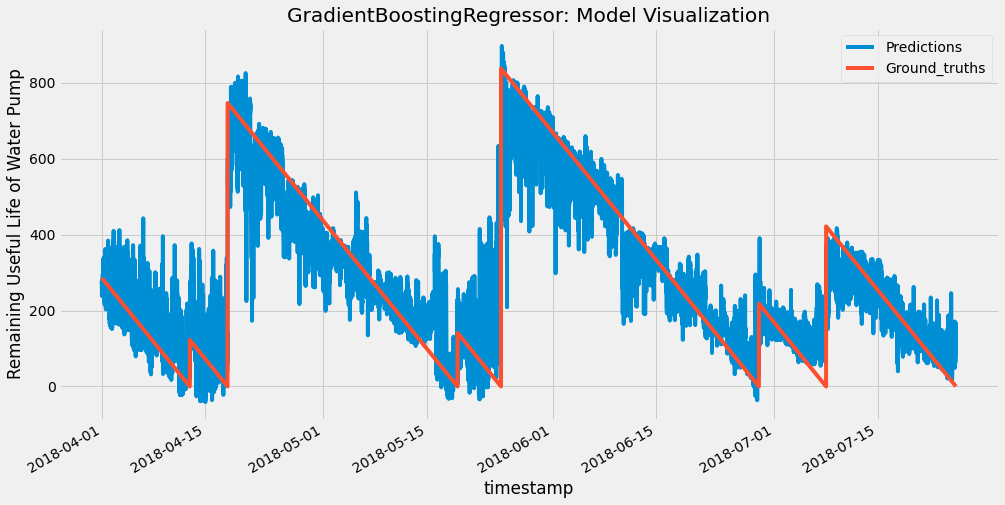

In [75]:
plot_model(gbr, 'GradientBoostingRegressor: ')

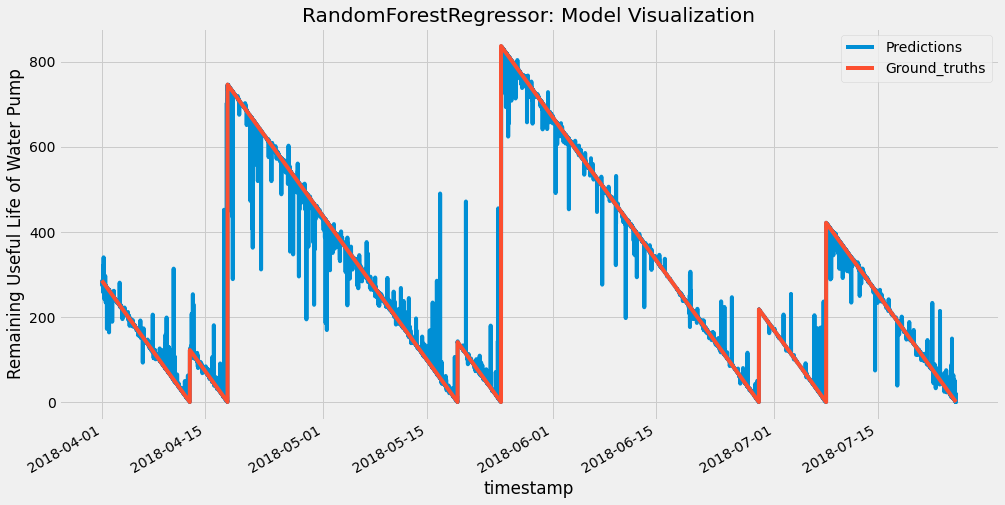

In [76]:
plot_model(rfr, 'RandomForestRegressor: ')

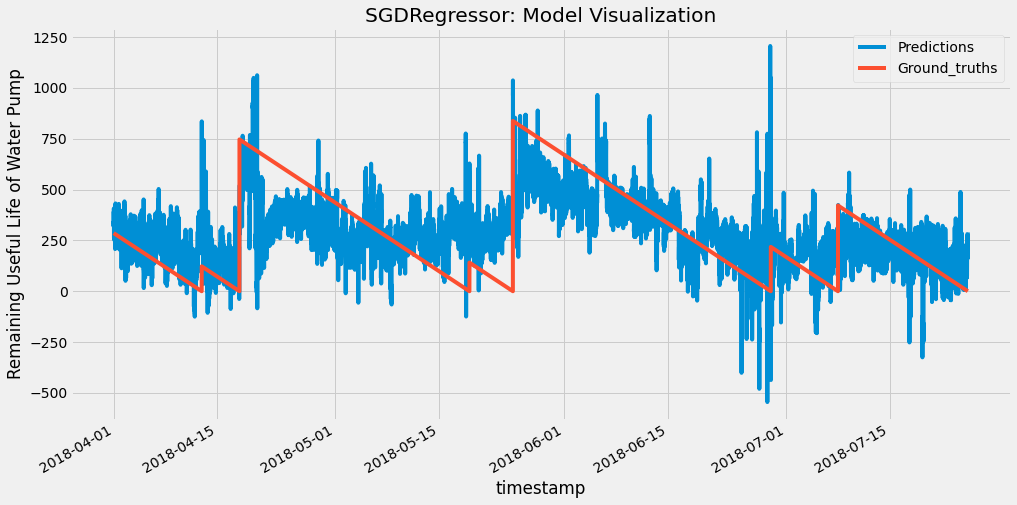

In [77]:
plot_model(sgr,'SGDRegressor: ')

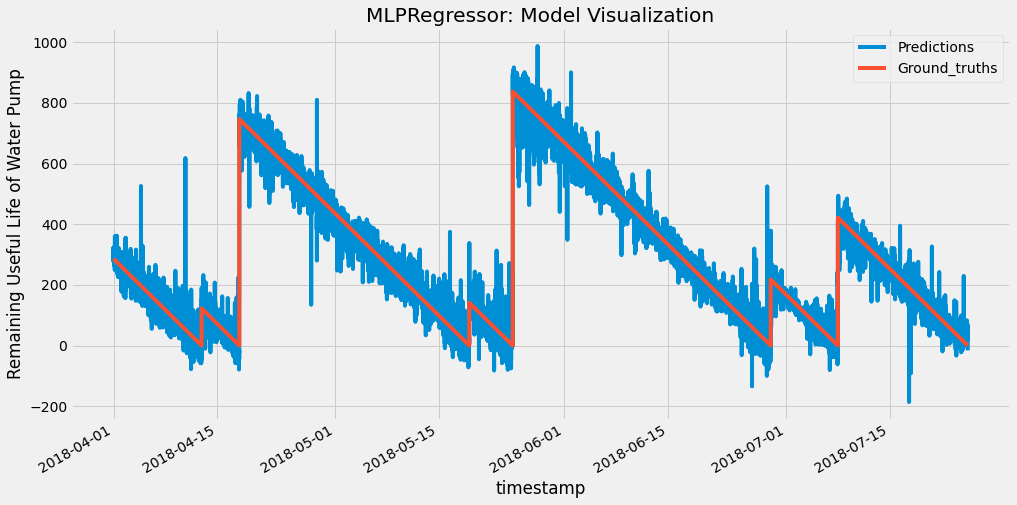

In [104]:
plot_model(mlpr,'MLPRegressor: ')

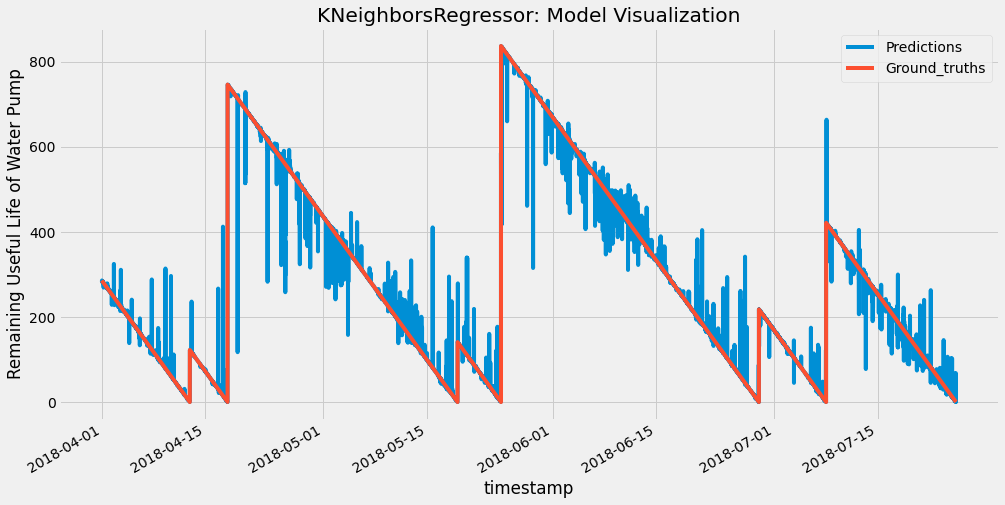

In [106]:
plot_model(knn,'KNeighborsRegressor: ')

### INFERENCE
<p> From the plots, we can see that the models that best fit the data are;</p>
<ul>
    <li> KNeighborsRegressor</li>
    <li> RandomForestRegressor</li>
    <li> MLPRegressor</li>
    <li> XGBRegressor</li>
    <li> GradientBoostingRegressor</li>
</ul>
<p> Recall the results from the Exploratory statistical analysis of the data set which is as follows;</p>
<ul>
    <li>Sensors 01,02,03,04 are highly correlating</li>
    <li>Sensors 10,11,12 are also highly correlating</li>
    <li>Sensors 14,16,17,18,19,20 are highly correlating</li>
    <li>Sensors 21,22,23,24,25,26,28,29,30 are highly correlating</li>
    <li>Sensors 31,32,33,35 are highly correlating</li>
    <li>Sensors 41,42,43 are highly correlating</li>
</ul>
<p> Next, we shall be performing some feature engineering on the data based on these results and the plot of feature importances earlier visualized</p>

### FEATURE ENGINEERING

In [159]:
input_data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889


In [160]:
engr_input = input_data.copy()
engr_input['sensor_45678'] = (engr_input['sensor_04']+engr_input['sensor_05']+engr_input['sensor_06']+engr_input['sensor_07'])/engr_input['sensor_08']

In [161]:
engr_input['sensor_9_10_12_14_16'] = (engr_input['sensor_09']+engr_input['sensor_10']+engr_input['sensor_12']+engr_input['sensor_14'])-(engr_input['sensor_16']+engr_input['sensor_18']+engr_input['sensor_17'])
engr_input['sensor_21_24_27'] = (engr_input['sensor_21']+engr_input['sensor_24'])-engr_input['sensor_27']
engr_input['sensor_31_33_37_38_39'] = (engr_input['sensor_31']+engr_input['sensor_33']++engr_input['sensor_37'])-(engr_input['sensor_38']  + +engr_input['sensor_39'])    
engr_input['sensor_40-51'] = (engr_input['sensor_40']+engr_input['sensor_41']+engr_input['sensor_42']+engr_input['sensor_43']+engr_input['sensor_44']+engr_input['sensor_45'])-(engr_input['sensor_46']+engr_input['sensor_47']+engr_input['sensor_48']+engr_input['sensor_49']+engr_input['sensor_51'])

In [162]:
engr_input.shape

(166441, 55)

In [163]:
engr_input.drop(['sensor_09','sensor_10','sensor_12','sensor_14','sensor_17','sensor_18','sensor_16','sensor_21','sensor_24','sensor_27','sensor_31','sensor_33','sensor_37','sensor_38','sensor_39','sensor_40','sensor_41','sensor_42','sensor_43','sensor_44','sensor_45','sensor_46','sensor_47','sensor_48','sensor_49','sensor_51','sensor_04','sensor_05','sensor_06','sensor_07','sensor_08'],axis=1,inplace=True)
engr_input.shape

(166441, 24)

In [164]:
engr_input.dtypes

sensor_00                float64
sensor_01                float64
sensor_02                float64
sensor_03                float64
sensor_11                float64
sensor_13                float64
sensor_19                float64
sensor_20                float64
sensor_22                float64
sensor_23                float64
sensor_25                float64
sensor_26                float64
sensor_28                float64
sensor_29                float64
sensor_30                float64
sensor_32                float64
sensor_34                float64
sensor_35                float64
sensor_36                float64
sensor_45678             float64
sensor_9_10_12_14_16     float64
sensor_21_24_27          float64
sensor_31_33_37_38_39    float64
sensor_40-51             float64
dtype: object

In [165]:
#Splitting the data into training,testing and validation sets
X_train,X_test,y_train,y_test = train_test_split(engr_input,target, train_size=0.75, random_state=43)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
knr_en,rfr_en,mlpr_en,xgbr_en,gbr_en = KNeighborsRegressor(n_neighbors = 10),RandomForestRegressor(), MLPRegressor(),XGBRegressor(),GradientBoostingRegressor()

In [167]:
regressors_en = [knr_en,rfr_en,mlpr_en,xgbr_en,gbr_en]
train_score_en = []
test_score_en = []
mean_abs_errors_en = []
rmse_en = []
max_errors_en = []
predictions_en = {}
for regressor in regressors_en:
    model = regressor.fit(X_train,y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,pred)
    max_err = max_error(y_test,pred)
    train_score_en.append(model.score(X_train,y_train))
    test_score_en.append(model.score(X_test,y_test))
    mean_abs_errors_en.append(mae)
    rmse_en.append(np.sqrt(mean_squared_error(y_test,pred)))
    max_errors_en.append(max_err)
    predictions_en[str(regressor)] = pred

C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [168]:
#Here, we present the model evaluation metrics in a pandas dataframe
ind= ['KNeighborsRegressor','RandomForestRegressor','MLPRegressor','XGBRegressor','GradientBoostingRegressor']
metrics_df2 = pd.DataFrame(columns=['train_scores','test_scores','Mean_abs_Error','Max_error','Root_Mean_Squared_Errors'], index =ind)
metrics_df2['train_scores'] = train_score_en
metrics_df2['test_scores'] = test_score_en
metrics_df2['Mean_abs_Error'] = mean_abs_errors_en
metrics_df2['Max_error'] = max_errors_en
metrics_df2['Root_Mean_Squared_Errors'] = rmse_en
metrics_df2

,train_scores,test_scores,Mean_abs_Error,Max_error,Root_Mean_Squared_Errors
KNeighborsRegressor,0.999023,0.999091,1.004836,451.098333,6.816360
RandomForestRegressor,0.999343,0.995305,2.206597,645.181500,15.496148
MLPRegressor,0.941698,0.940890,38.066936,1166.028735,54.981826
XGBRegressor,0.993007,0.988724,13.088571,703.052898,24.013616
GradientBoostingRegressor,0.909681,0.907544,46.665160,631.437009,68.763312


Text(0.5, 1.0, 'Graph of Feature Importances')

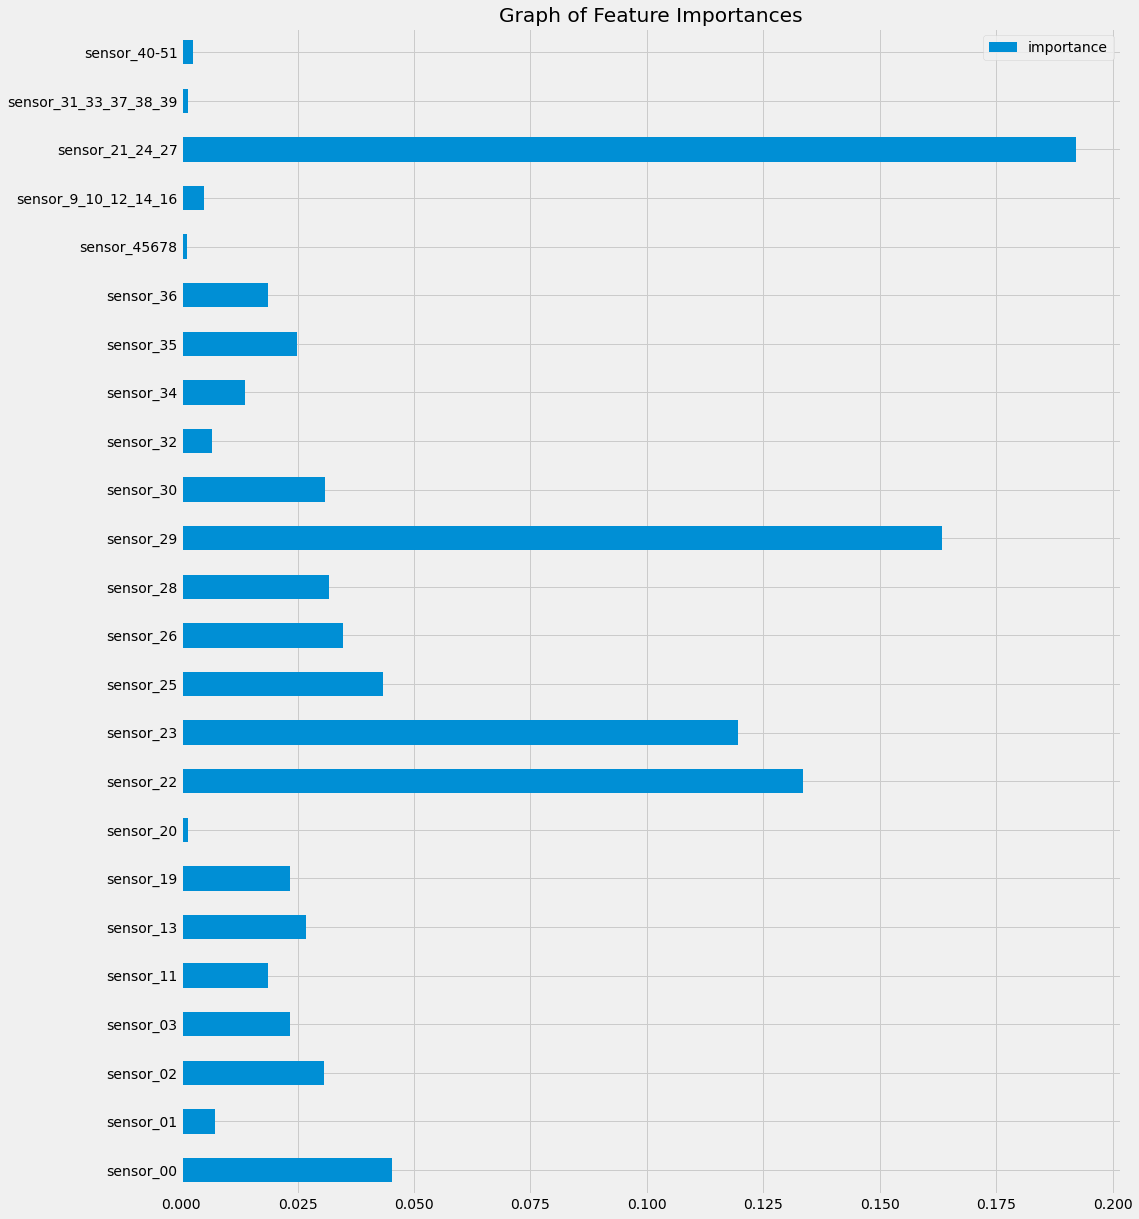

In [170]:
#Checking the most relevant features to the tree models
cols = list(engr_input.columns)
impt_features = rfr_en.feature_importances_
impt_df2 = pd.DataFrame(index = cols)
impt_df2['importance']= impt_features
ax2 = impt_df2.plot(kind='barh', figsize = (15,20))
ax2.set_title('Graph of Feature Importances')

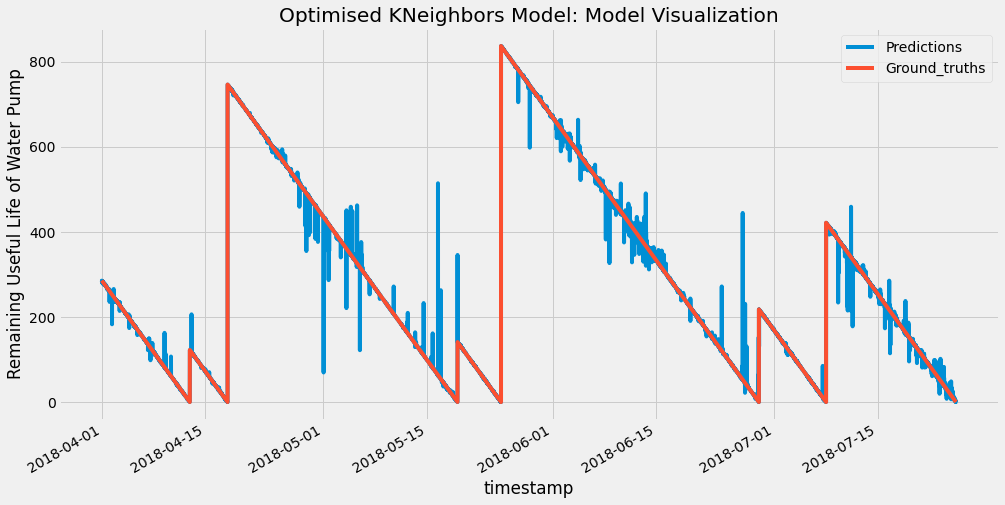

In [171]:
plot_model(knr_en,'Optimised KNeighbors Model: ')

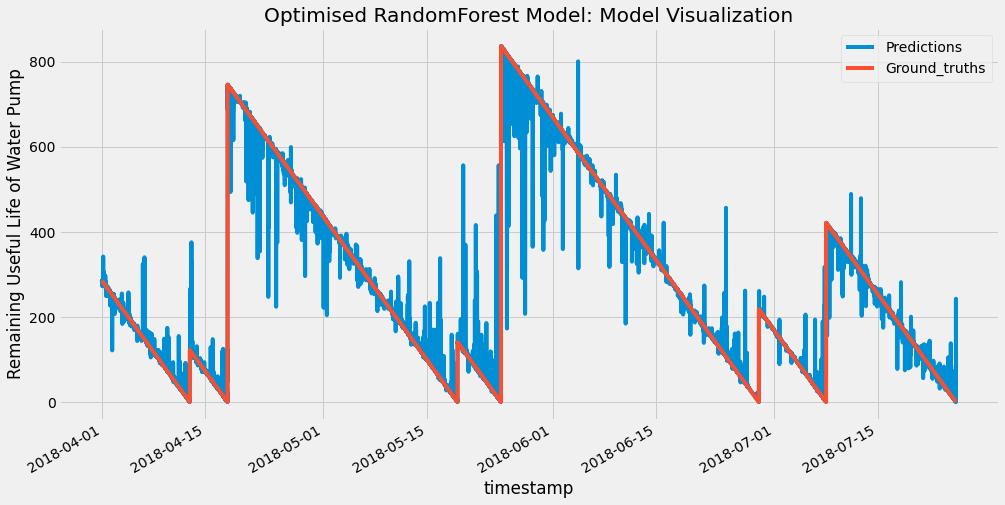

In [172]:
plot_model(rfr_en,'Optimised RandomForest Model: ')

In [ ]:
,mlpr_en,xgbr_en,gbr_en]

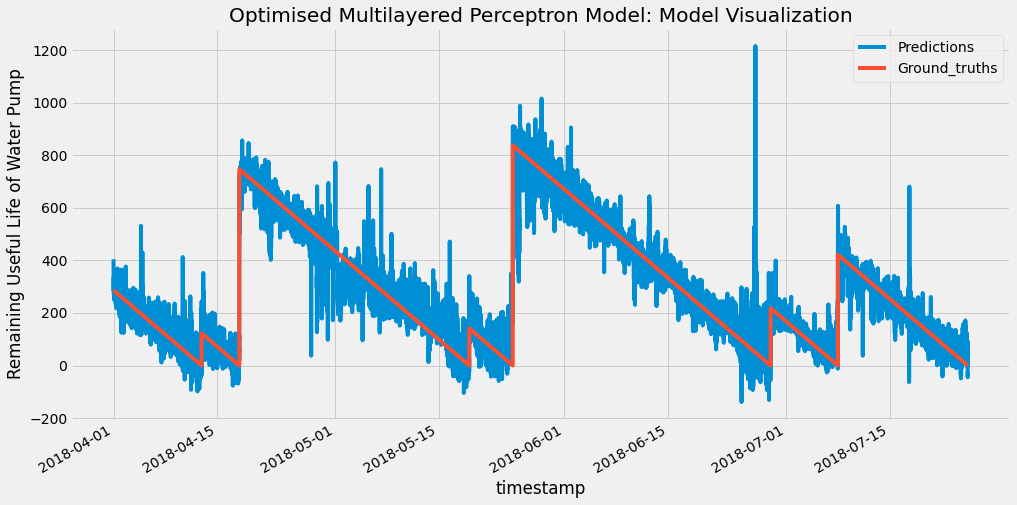

In [173]:
plot_model(mlpr_en,'Optimised Multilayered Perceptron Model: ')

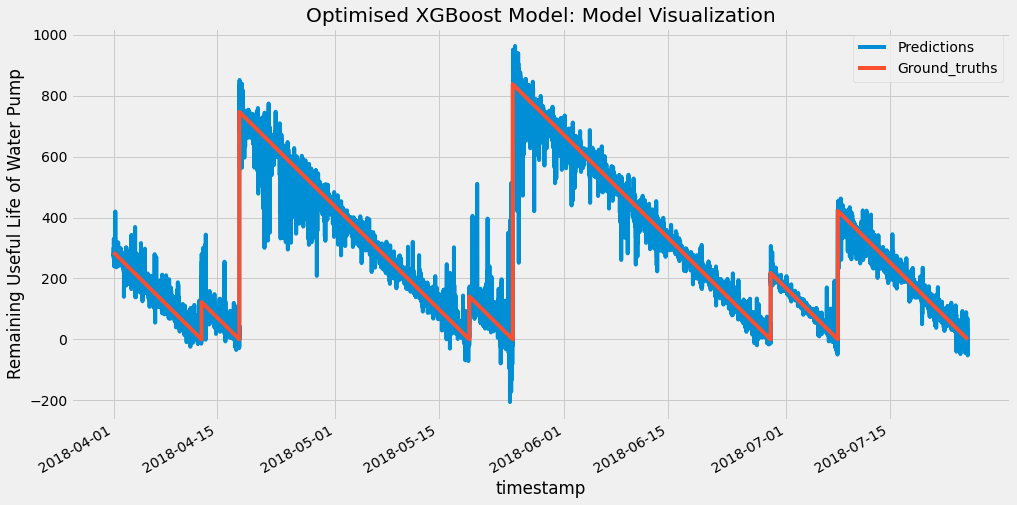

In [175]:
plot_model(xgbr_en,'Optimised XGBoost Model: ')

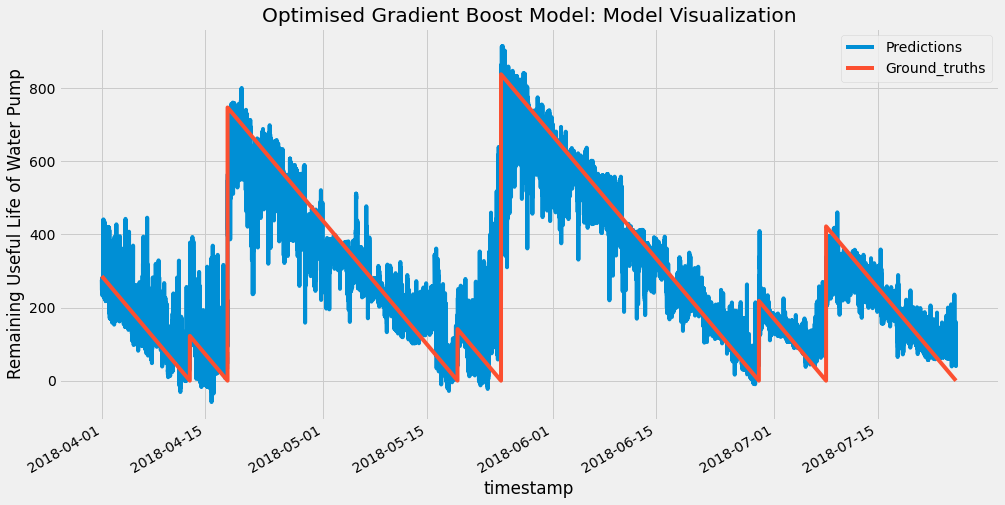

In [176]:
plot_model(gbr_en,'Optimised Gradient Boost Model: ')

### INFERENCE
<p> The feature engineering techniques used in this notebook were purely intuitive and worked out pretty well in developing better models. From the plots of each model and the metrics result, we can clearly see that the kneighbors regressor best fits the dataset. This conclusion is far preferred because not only does the model fit the data really well, it is also a very simple model which does not have many hyperparameters to be tuned. It should also be noted that it is more desired for the remaining useful life predicted by the model be less than the actual remaining useful life to give engineers more sense of urgency to perform preventive maintenance on the water pump. This is also one major reason why this model was picked over the others.</p>
<p> Next, we shall save the model and conclude our study</p>

In [177]:
import joblib

In [178]:
joblib.dump(knr_en,'water_pump_model.sav')

['water_pump_model.sav']

In [179]:
load_model = joblib.load('water_pump_model.sav')
load_model.score(X_test,y_test)

0.9990914960310746